In [1]:
#function to test models 
import nest_asyncio
import warnings
from mb_utils.src.logging import logger

nest_asyncio.apply()
warnings.filterwarnings("ignore")

In [2]:
from mb_pytorch.version import version
version

'1.3.43'

In [3]:
from mb_pytorch.utils.yaml_reader import YAMLReader
from mb_pytorch.dataloader.loader import BaseDataset,TorchDataLoader

In [4]:
yaml_read = YAMLReader('../scripts/detection/object_detection.yaml') #load the data
yaml_data = yaml_read.read()

In [5]:
yaml_data['model']

{'model_type': 'detection',
 'model': 'faster_rcnn',
 'use_pretrained': True,
 'use_own_model': False,
 'model_path': '/home/malav/Desktop/mb_packages/mb_pytorch/models/...',
 'device': 'cpu',
 'load_model': False,
 'use_torchvision_models': True,
 'model_name': 'fasterrcnn_resnet50_fpn',
 'model_version': '50',
 'model_backbone': 'resnet',
 'model_optimizer': 'Adam',
 'model_loss': 'cross_entropy',
 'model_scheduler': 'StepLR',
 'model_pretrained': True,
 'model_epochs': 3,
 'model_num_classes': 41,
 'model_initialization': 'None',
 'model_meta_data': {'model_bbox_threshold': 0.8},
 'model_train_parameters': {'Adam': {'lr': 0.001,
   'betas': [0.9, 0.999],
   'eps': 1e-08,
   'weight_decay': 0,
   'amsgrad': False},
  'SGD': {'lr': 0.01,
   'momentum': 0.9,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False},
  'RMSprop': {'lr': 0.01,
   'alpha': 0.99,
   'eps': 1e-08,
   'weight_decay': 0,
   'momentum': 0,
   'centered': False},
  'cross_entropy': {'weight': 'None',
   's

In [6]:
# model_init = ModelLoader(yaml_data['model'])
# model = model_init.get_model()
# model

In [7]:
train_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'], 
                            transform=yaml_data['transformation'],is_train=True,logger=logger)

val_dataset = BaseDataset(data_config=yaml_data['data']['file'], task_type=yaml_data['model']['model_type'],
                          transform=yaml_data['transformation'],is_train=False,logger=logger)


Fri 12:40:15,797 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv         
Fri 12:40:15,800 INF Loading DataFrame from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv    
Fri 12:40:15,806 INF Successfully loaded DataFrame with shape (300, 5)                                                               
Fri 12:40:15,815 INF Checking duplicates for columns: ['image_path']                                                                 
Fri 12:40:15,817 INF No duplicates found                                                                                             
Fri 12:40:15,819 INF Removing unnamed columns                                                                                        
Fri 12:40:15,831 INF Loading data from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final.csv         
Fri 12:40:15,832 INF Loading DataFrame from /home/malav/Deskto

In [8]:

train_dataloader= TorchDataLoader(dataset=train_dataset, batch_size=yaml_data['train_params']['batch_size'],
                                  shuffle=yaml_data['train_params']['shuffle'],num_workers=yaml_data['train_params']['num_workers'])

val_dataloader= TorchDataLoader(dataset=val_dataset, batch_size=yaml_data['val_params']['batch_size'],
                                  shuffle=yaml_data['val_params']['shuffle'],num_workers=yaml_data['val_params']['num_workers'])

In [9]:
from mb_pytorch.detection.training import DetectionTrainer

In [10]:
DetectionTrainer?

Init signature:
DetectionTrainer(
    config: Dict[str, Any],
    train_loader: torch.utils.data.dataloader.DataLoader = None,
    val_loader: torch.utils.data.dataloader.DataLoader = None,
    writer: Optional[Any] = None,
    logger: Optional[Any] = None,
    gradcam: Optional[Any] = None,
    gradcam_rgb: bool = False,
    device: str = 'cpu',
    use_all_cpu_cores: bool = False,
)
Docstring:      Trainer class specifically for object detection models.
Init docstring:
Initialize the detection trainer.

Args:
    config: Configuration dictionary
    scheduler: Optional learning rate scheduler
    writer: Optional tensorboard writer
    logger: Optional logger instance
    gradcam: Optional gradcam layers to visualize
    gradcam_rgb: Whether to use RGB for gradcam
    device: Device to run training on
    use_all_cpu_cores: Whether to use all CPU cores for data loading. (2 cpu cores less than max. default)
File:           ~/.local/lib/python3.11/site-packages/mb_pytorch/detection/tra

In [11]:
trainer_func = DetectionTrainer(yaml_data,train_dataloader,val_dataloader,logger=logger,
                                device='cpu',use_all_cpu_cores=True)

Fri 12:40:16,053 INF Loading model...                                                                                                
Fri 12:40:16,636 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Fri 12:40:16,638 INF Setting up training components...                                                                               
Fri 12:40:16,640 INF Loss function: cross_entropy                                                                                    
Fri 12:40:16,641 INF Optimizer: Adam                                                                                                 
Fri 12:40:16,642 INF Scheduler: StepLR                                                                                               


Setting TorchScript to use all available cores
Current number of threads for torch: 12
Number of available cores: 24
Number of threads set to: 22. Using 2 less than available cores for other tasks.


In [12]:
trainer_func.train()

Fri 12:40:16,684 INF Starting training...                                                                                            
Epochs:   0%|          | 0/3 [00:00<?, ?it/s]Fri 12:40:16,688 INF Training Started                                                                                                

Training:   0%|          | 0/30 [00:00<?, ?it/s]Fri 12:40:49,385 INF Epoch 1 - Batch 1 - Train Loss: 0.5790421366691589                                                              

Training:   3%|▎         | 1/30 [00:32<15:48, 32.70s/it]Fri 12:41:21,185 INF Epoch 1 - Batch 2 - Train Loss: 0.8339396119117737                                                              

Training:   7%|▋         | 2/30 [01:04<15:00, 32.17s/it]Fri 12:41:52,185 INF Epoch 1 - Batch 3 - Train Loss: 1.6523444652557373                                                              

Training:  10%|█         | 3/30 [01:35<14:14, 31.63s/it]Fri 12:42:22,025 INF Epoch 1 - Batch 4 - Train Loss: 0.8752748370

In [13]:
for i, data in enumerate(val_dataloader):
    print(data)
    break

{'image': [tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9913, 0.9953, 0.9960],
         [1.0000, 1.0000, 1.0000,  ..., 0.9950, 0.9976, 0.9949],
         [1.0000, 1.0000, 1.0000,  ..., 0.9974, 0.9988, 0.9934],
       

In [14]:
import torch
images, bbox, labels = data.values()
images = [image.to('cpu') for image in images]
bbox = [b.to('cpu') for b in bbox]
bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
labels = [torch.tensor([label.to('cpu').tolist()]) for label in labels]
            
targets = [
                {'boxes': b, 'labels': label} 
                for b, label in zip(bbox, labels)
            ]


In [15]:
targets

[{'boxes': tensor([[196,  83, 479, 420]], dtype=torch.int32),
  'labels': tensor([2])},
 {'boxes': tensor([[125, 118, 777, 411]], dtype=torch.int32),
  'labels': tensor([1])},
 {'boxes': tensor([[  1, 134, 142, 326]], dtype=torch.int32),
  'labels': tensor([0])},
 {'boxes': tensor([[405, 155, 712, 506]], dtype=torch.int32),
  'labels': tensor([0])},
 {'boxes': tensor([[189,  64, 602, 523]], dtype=torch.int32),
  'labels': tensor([2])},
 {'boxes': tensor([[252,  60, 732, 476]], dtype=torch.int32),
  'labels': tensor([0])},
 {'boxes': tensor([[  0, 334, 731, 589]], dtype=torch.int32),
  'labels': tensor([1])},
 {'boxes': tensor([[216,  68, 628, 593]], dtype=torch.int32),
  'labels': tensor([2])}]

In [25]:
trainer_func.model.eval()
loss_dict = trainer_func.model(images,targets)

In [ ]:
loss_dict,detections =eval_forward(trainer_func.model,images,targets)

In [ ]:
loss_dict

In [ ]:
loss_dict.keys()

dict_keys(['boxes', 'labels', 'scores'])

In [31]:
from typing import Tuple, List, Dict, Optional
import torch
from torch import Tensor
from collections import OrderedDict
from torchvision.models.detection.roi_heads import fastrcnn_loss
from torchvision.models.detection.rpn import concat_box_prediction_layers
def eval_forward(model, images, targets):
    # type: (List[Tensor], Optional[List[Dict[str, Tensor]]]) -> Tuple[Dict[str, Tensor], List[Dict[str, Tensor]]]
    """
    Args:
        images (list[Tensor]): images to be processed
        targets (list[Dict[str, Tensor]]): ground-truth boxes present in the image (optional)
    Returns:
        result (list[BoxList] or dict[Tensor]): the output from the model.
            It returns list[BoxList] contains additional fields
            like `scores`, `labels` and `mask` (for Mask R-CNN models).
    """
    model.eval()

    original_image_sizes: List[Tuple[int, int]] = []
    for img in images:
        val = img.shape[-2:]
        assert len(val) == 2
        original_image_sizes.append((val[0], val[1]))

    images, targets = model.transform(images, targets)

    # Check for degenerate boxes
    # TODO: Move this to a function
    if targets is not None:
        for target_idx, target in enumerate(targets):
            boxes = target["boxes"]
            degenerate_boxes = boxes[:, 2:] <= boxes[:, :2]
            if degenerate_boxes.any():
                # print the first degenerate box
                bb_idx = torch.where(degenerate_boxes.any(dim=1))[0][0]
                degen_bb: List[float] = boxes[bb_idx].tolist()
                raise ValueError(
                    "All bounding boxes should have positive height and width."
                    f" Found invalid box {degen_bb} for target at index {target_idx}."
                )

    features = model.backbone(images.tensors)
    if isinstance(features, torch.Tensor):
        features = OrderedDict([("0", features)])
    model.rpn.training=True
    #model.roi_heads.training=True


    #####proposals, proposal_losses = model.rpn(images, features, targets)
    features_rpn = list(features.values())
    objectness, pred_bbox_deltas = model.rpn.head(features_rpn)
    anchors = model.rpn.anchor_generator(images, features_rpn)

    num_images = len(anchors)
    num_anchors_per_level_shape_tensors = [o[0].shape for o in objectness]
    num_anchors_per_level = [s[0] * s[1] * s[2] for s in num_anchors_per_level_shape_tensors]
    objectness, pred_bbox_deltas = concat_box_prediction_layers(objectness, pred_bbox_deltas)
    # apply pred_bbox_deltas to anchors to obtain the decoded proposals
    # note that we detach the deltas because Faster R-CNN do not backprop through
    # the proposals
    proposals = model.rpn.box_coder.decode(pred_bbox_deltas.detach(), anchors)
    proposals = proposals.view(num_images, -1, 4)
    proposals, scores = model.rpn.filter_proposals(proposals, objectness, images.image_sizes, num_anchors_per_level)

    proposal_losses = {}
    assert targets is not None
    labels, matched_gt_boxes = model.rpn.assign_targets_to_anchors(anchors, targets)
    regression_targets = model.rpn.box_coder.encode(matched_gt_boxes, anchors)
    loss_objectness, loss_rpn_box_reg = model.rpn.compute_loss(
        objectness, pred_bbox_deltas, labels, regression_targets
    )
    proposal_losses = {
        "loss_objectness": loss_objectness,
        "loss_rpn_box_reg": loss_rpn_box_reg,
    }

    #####detections, detector_losses = model.roi_heads(features, proposals, images.image_sizes, targets)
    image_shapes = images.image_sizes
    proposals, matched_idxs, labels, regression_targets = model.roi_heads.select_training_samples(proposals, targets)
    box_features = model.roi_heads.box_roi_pool(features, proposals, image_shapes)
    box_features = model.roi_heads.box_head(box_features)
    class_logits, box_regression = model.roi_heads.box_predictor(box_features)

    result: List[Dict[str, torch.Tensor]] = []
    detector_losses = {}
    loss_classifier, loss_box_reg = fastrcnn_loss(class_logits, box_regression, labels, regression_targets)
    detector_losses = {"loss_classifier": loss_classifier, "loss_box_reg": loss_box_reg}
    boxes, scores, labels = model.roi_heads.postprocess_detections(class_logits, box_regression, proposals, image_shapes)
    num_images = len(boxes)
    for i in range(num_images):
        result.append(
            {
                "boxes": boxes[i],
                "labels": labels[i],
                "scores": scores[i],
            }
        )
    detections = result
    detections = model.transform.postprocess(detections, images.image_sizes, original_image_sizes)  # type: ignore[operator]
    model.rpn.training=False
    model.roi_heads.training=False
    losses = {}
    losses.update(detector_losses)
    losses.update(proposal_losses)
    return losses, detections

In [3]:
from mb_pytorch.dataloader.loader import DataLoader

k = DataLoader('../scripts/detection/object_detection.yaml',logger=logger)
k_data = k.data_dict['data']
model_data_dict = k.data_dict['model']

Thu 13:44:58,693 INF Read data from yaml file: [{'data': {'file': {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dat


In [4]:
from mb_pytorch.training.train_params import train_helper
model_yaml_data = k.data_dict['model']
loss_attr,optimizer_attr,optimizer_dict,scheduler_attr,scheduler_dict = train_helper(model_yaml_data) 

In [5]:
from torch.utils.tensorboard import SummaryWriter
import os

path_logs = os.path.join(os.path.split(k_data['file']['root'])[0], 'logs')
writer = SummaryWriter(log_dir=path_logs)


In [6]:
train_loader,val_loader,train_dataset,test_dataset = k.data_load()


50row [00:00, 16946.68row/s]
Thu 13:44:59,735 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 13:44:59,737 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 13:44:59,739 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 13:44:59,740 INF Data will be split into train and validation according to train_file input : True                               
Thu 13:44:59,741 INF If unnamed columns are present, they will be removed.                                                           
Thu 13:44:59,742 INF If duplicate rows are present, they will be removed.                                                            
Thu 13:44:59,746 INF Length of data after removing invalid paths: 50                                                                 
Thu 13:44:59,747 INF Skipping ima

In [7]:
train_dataset.__getitem__(0)

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

In [8]:
test_dataset.__getitem__(4)

(tensor([[[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0031, 0.0130,  ..., 0.0000, 0.0000, 0.0000],
          [0.0093, 0.0101, 0.0128,  ..., 0.0000, 0.0000, 0.0000],
          [0.0246, 0.0217, 0.0123,  ...,

In [9]:
from mb_pytorch.models.modelloader import ModelLoader
model_data_load = ModelLoader(k.data_dict['model'])
model =  model_data_load.get_model()

Thu 13:45:02,271 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [10]:
from mb_pytorch.detection.training import detection_train_loop


Thu 13:45:08,035 INF Training loop Starting                                                                                          
Thu 13:45:08,579 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   
Thu 13:45:08,581 INF Model Loaded                                                                                                    
50row [00:00, 35299.65row/s]
Thu 13:45:08,586 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 13:45:08,588 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 13:45:08,590 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 13:45:08,592 INF Data will be split into train and validation according to train_file input : True                               
Thu 13:45:08,593 INF If unnamed c

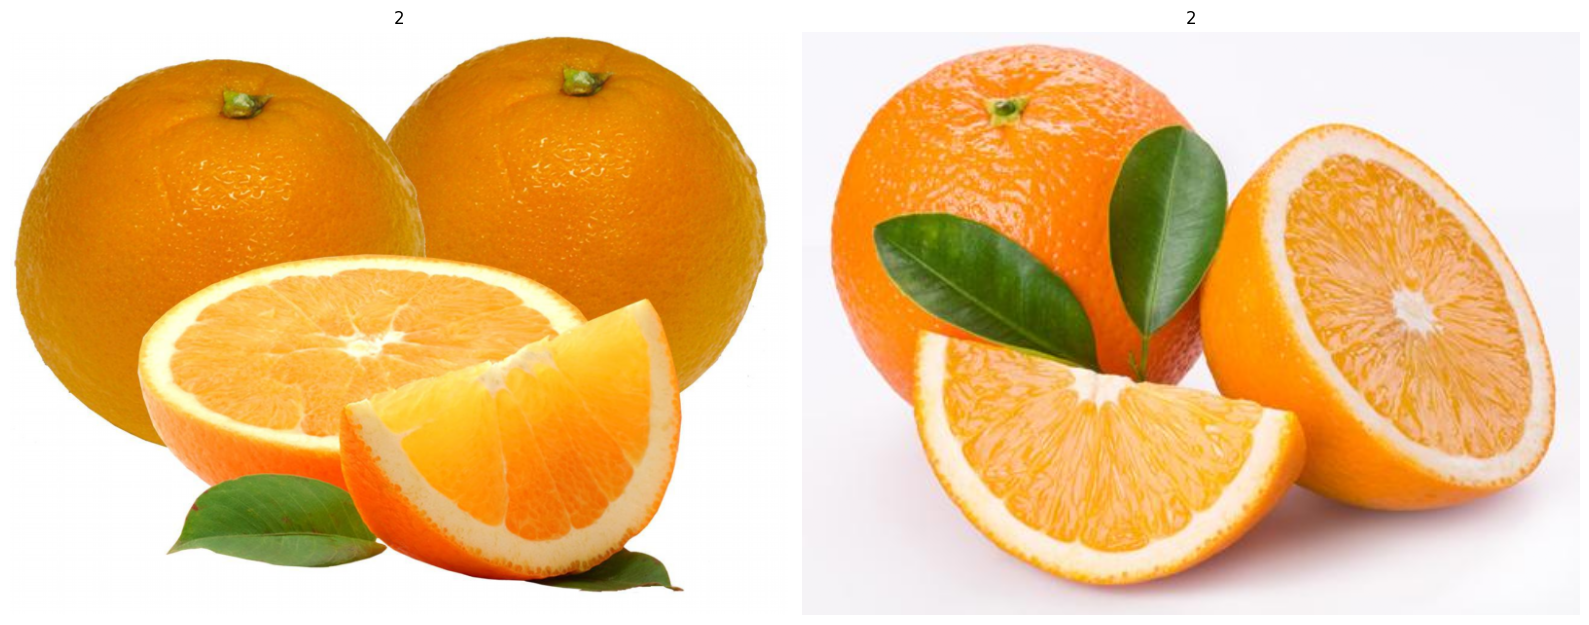

Thu 13:49:15,080 INF Epoch 1 - Best Model Saved (Val Loss: 0.5034)                                                                   
Epochs:  33%|███▎      | 1/3 [04:06<08:12, 246.43s/it]Thu 13:49:15,082 INF Training Started                                                                                                

Training:   0%|          | 0/7 [00:00<?, ?it/s]Thu 13:49:45,106 INF Epoch 2 - Batch 1 - Train Loss: 0.21386967599391937                                                             

Training:  14%|█▍        | 1/7 [00:30<03:00, 30.02s/it]Thu 13:50:15,873 INF Epoch 2 - Batch 2 - Train Loss: 0.48240163922309875                                                             

Training:  29%|██▊       | 2/7 [01:00<02:32, 30.46s/it]Thu 13:50:44,830 INF Epoch 2 - Batch 3 - Train Loss: 0.5858010053634644                                                              

Training:  43%|████▎     | 3/7 [01:29<01:59, 29.77s/it]Thu 13:51:13,631 INF Epoch 2 - Batch 4 - Train Loss: 0.74838

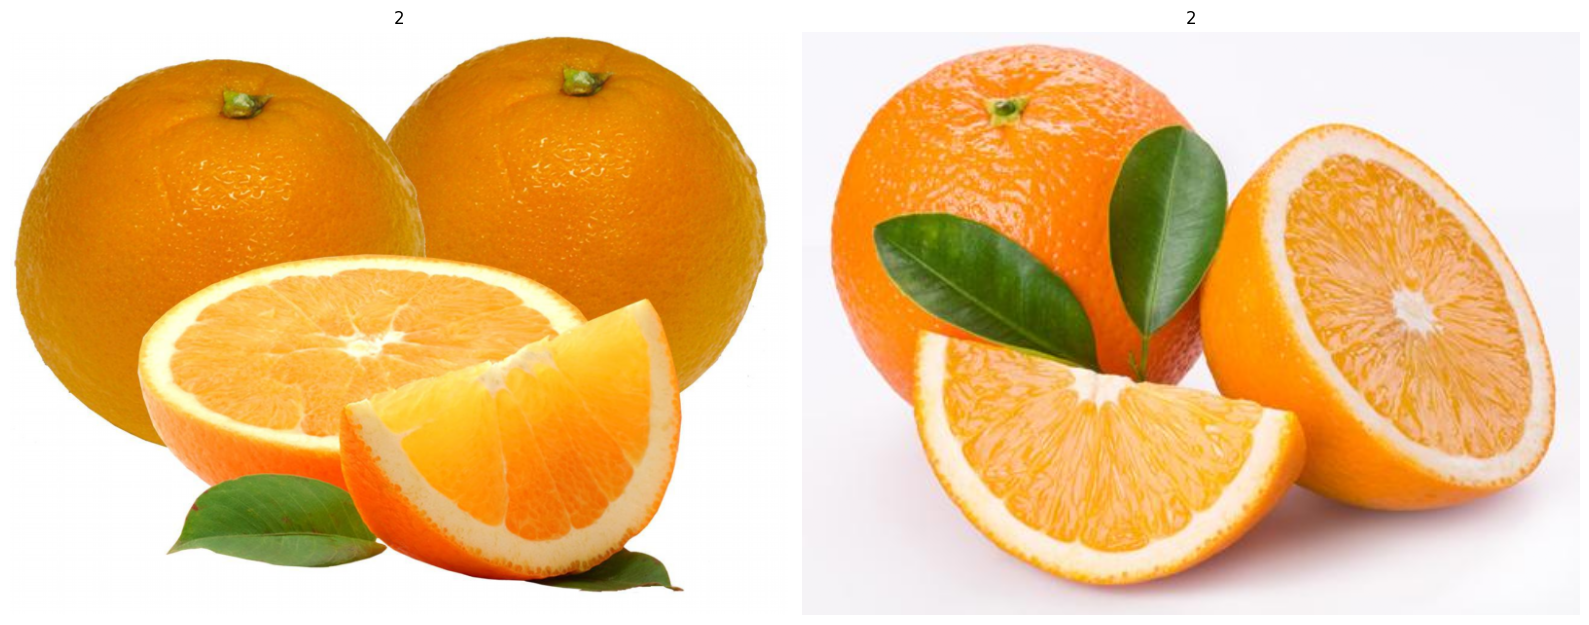

Epochs:  67%|██████▋   | 2/3 [08:26<04:14, 254.38s/it]Thu 13:53:35,068 INF Training Started                                                                                                

Training:   0%|          | 0/7 [00:00<?, ?it/s]Thu 13:54:03,327 INF Epoch 3 - Batch 1 - Train Loss: 0.18260817229747772                                                             

Training:  14%|█▍        | 1/7 [00:28<02:48, 28.11s/it]Thu 13:54:29,996 INF Epoch 3 - Batch 2 - Train Loss: 0.3838209807872772                                                              

Training:  29%|██▊       | 2/7 [00:54<02:16, 27.26s/it]Thu 13:54:57,758 INF Epoch 3 - Batch 3 - Train Loss: 0.4825749695301056                                                              

Training:  43%|████▎     | 3/7 [01:22<01:49, 27.49s/it]Thu 13:55:23,422 INF Epoch 3 - Batch 4 - Train Loss: 0.655086100101471                                                               

Training:  57%|█████▋    | 4/7 [01:48<01:20, 26.77s/it]Thu 

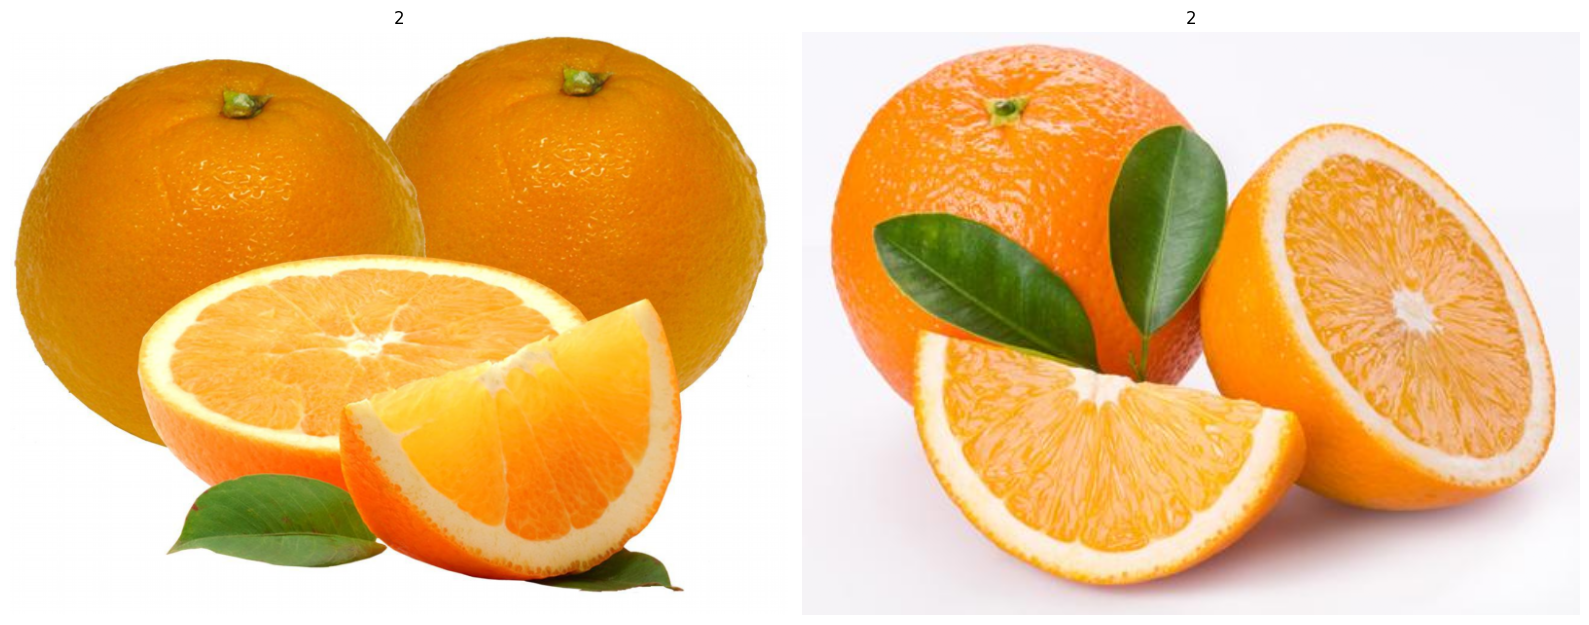

Epochs: 100%|██████████| 3/3 [12:32<00:00, 250.94s/it]


In [11]:
detection_train_loop(k,model_data_dict,writer=writer,logger=logger)

In [ ]:
## tests

In [12]:
k_data_test = k.data_dict['data']
data_model_test = k.data_dict['model']
model_data_load_test = ModelLoader(k.data_dict['model'])
model_test =  model_data_load_test.get_model()
device_type = data_model_test['device']
bbox_threshold = data_model_test['model_meta_data']['model_bbox_threshold']

Thu 01:06:56,077 INF Model fasterrcnn_resnet50_fpn loaded from torchvision.models.                                                   


In [13]:
import torch
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from mb.plt.utils import dynamic_plt
from mb_pytorch.utils.viewer import gradcam_viewer,plot_classes_pred,plot_to_image


In [14]:
train_loader_test,val_loader_test,_,_ = k.data_load()
loss_attr_test,optimizer_attr_test,optimizer_dict_test,scheduler_attr_test,scheduler_dict_test = train_helper(data_model_test) 
optimizer_test = optimizer_attr_test(model_test.parameters(),**optimizer_dict_test)
scheduler_test = None
if scheduler_test is not None:
    scheduler_test = scheduler_attr(optimizer_test,**scheduler_dict)


device = torch.device('cpu')


model_test.to(device)
best_val_loss = float('inf')


50row [00:00, 23185.76row/s]
Thu 01:06:58,215 INF Loaded dataframe from /home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv
Thu 01:06:58,218 INF Data file: {'root': '/home/malav/Desktop/mb_packages/mb_pytorch/data/fruit_dataset/fruit_dataset_final_test.csv'
Thu 01:06:58,220 INF Data columns: Index(['image_id', 'image_path', 'bbox', 'label', 'image_type'], dtype='object')                  
Thu 01:06:58,223 INF Data will be split into train and validation according to train_file input : True                               
Thu 01:06:58,225 INF If unnamed columns are present, they will be removed.                                                           
Thu 01:06:58,227 INF If duplicate rows are present, they will be removed.                                                            
Thu 01:06:58,232 INF Length of data after removing invalid paths: 50                                                                 
Thu 01:06:58,234 INF Skipping ima

Training: 100%|██████████| 7/7 [02:54<00:00, 20.73s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 1.9082192182540894



Validation:  14%|█▍        | 1/7 [00:12<01:16, 12.74s/it]

Val loss : 3.8164384365081787



Validation:  29%|██▊       | 2/7 [00:24<00:59, 11.93s/it]

Val loss : 5.724657654762268



Validation:  43%|████▎     | 3/7 [00:36<00:48, 12.01s/it]

Val loss : 7.632876873016357



Validation:  57%|█████▋    | 4/7 [00:47<00:35, 11.91s/it]

Val loss : 9.541096091270447



Validation:  71%|███████▏  | 5/7 [00:59<00:23, 11.72s/it]

Val loss : 11.449315309524536



Validation:  86%|████████▌ | 6/7 [01:10<00:11, 11.55s/it]

Val loss : 11.926370114088058



Validation: 100%|██████████| 7/7 [01:12<00:00,  8.52s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


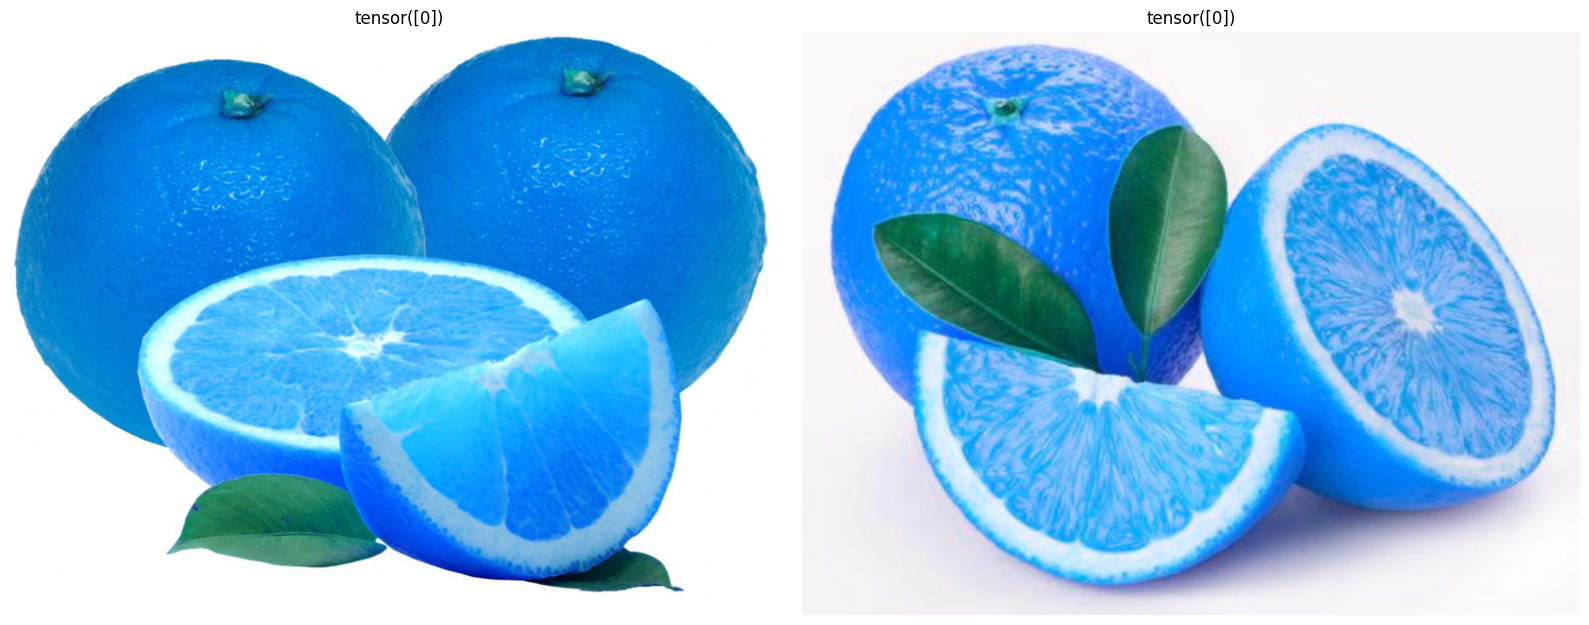

Training: 100%|██████████| 7/7 [02:40<00:00, 19.00s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 0.23544849455356598



Validation:  14%|█▍        | 1/7 [00:12<01:13, 12.27s/it]

Val loss : 0.47089698910713196



Validation:  29%|██▊       | 2/7 [00:22<00:56, 11.30s/it]

Val loss : 0.7063454836606979



Validation:  43%|████▎     | 3/7 [00:33<00:44, 11.09s/it]

Val loss : 0.9417939782142639



Validation:  57%|█████▋    | 4/7 [00:44<00:32, 10.90s/it]

Val loss : 1.17724247276783



Validation:  71%|███████▏  | 5/7 [00:54<00:21, 10.78s/it]

Val loss : 1.4126909673213959



Validation:  86%|████████▌ | 6/7 [01:05<00:10, 10.70s/it]

Val loss : 1.4715530909597874



Validation: 100%|██████████| 7/7 [01:07<00:00,  7.89s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


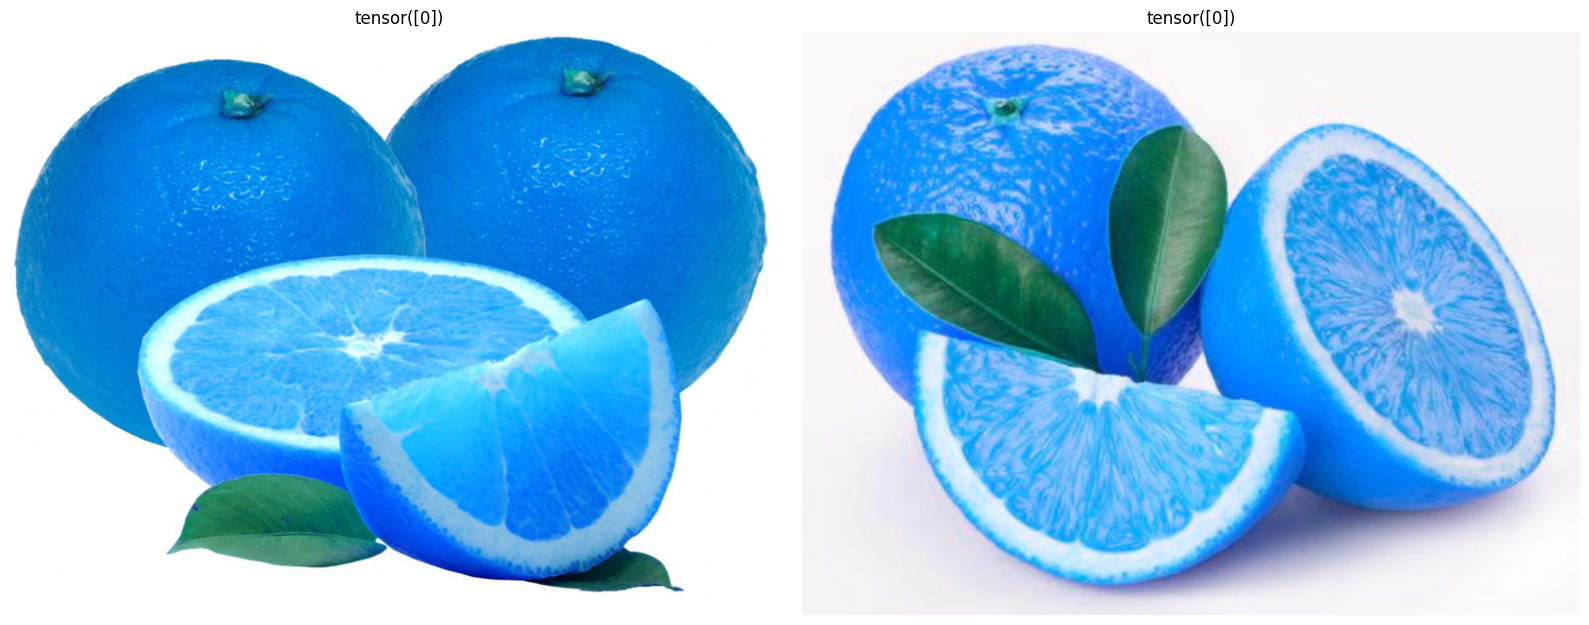

Training: 100%|██████████| 7/7 [02:41<00:00, 19.14s/it]
                                                       
Validation:   0%|          | 0/7 [00:00<?, ?it/s]

Val loss : 0.35187631845474243



Validation:  14%|█▍        | 1/7 [00:11<01:11, 11.99s/it]

Val loss : 0.7037526369094849



Validation:  29%|██▊       | 2/7 [00:24<01:00, 12.04s/it]

Val loss : 1.0556289553642273



Validation:  43%|████▎     | 3/7 [00:35<00:46, 11.64s/it]

Val loss : 1.4075052738189697



Validation:  57%|█████▋    | 4/7 [00:46<00:34, 11.47s/it]

Val loss : 1.7593815922737122



Validation:  71%|███████▏  | 5/7 [00:57<00:22, 11.38s/it]

Val loss : 2.1112579107284546



Validation:  86%|████████▌ | 6/7 [01:09<00:11, 11.66s/it]

Val loss : 2.19922699034214



Validation: 100%|██████████| 7/7 [01:12<00:00,  8.69s/it]
                                                         Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


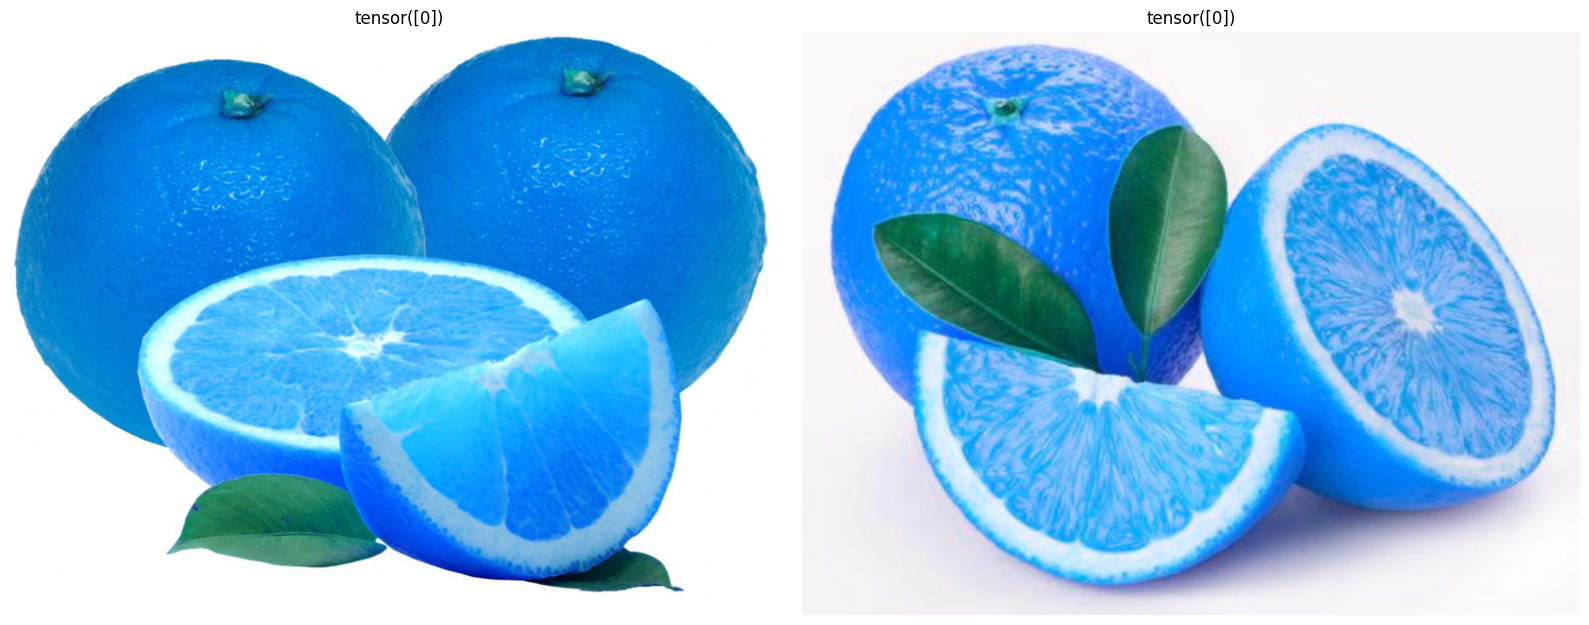

Epochs: 100%|██████████| 3/3 [12:04<00:00, 241.45s/it]


In [16]:
gradcam,gradcam_rgb = None,False
for epoch in tqdm.tqdm(range(data_model_test['model_epochs']), desc="Epochs"):
        
    ##train loop
        
    model_test.train(True)
    train_loss = 0
        

    for batch_idx, data in enumerate(tqdm.tqdm(train_loader_test, desc="Training", leave=False)):
        images,bbox,labels = data.values()
        images = list(image.to(device) for image in images)
        bbox = list(b.to(device) for b in bbox)
        bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
        labels = list(label.to(device) for label in labels)  
        targets = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]      
                    
        optimizer_test.zero_grad()
        loss_dict_train = model_test(images, targets)
        losses = sum(loss for loss in loss_dict_train.values())
            
        losses.backward()
        optimizer_test.step()
        if scheduler_test is not None:
            scheduler_test.step()
            
        train_loss += losses.item()
    avg_train_loss = train_loss / len(train_loader_test)

    model_test.train(False)

    ## Validation loop
    val_loss = 0
    val_bbox = []
    val_labels = []
    val_scores = []
    val_targets_labels = []
    val_targets_bbox = []

    with torch.no_grad():
        for batch_idx, data in enumerate(tqdm.tqdm(val_loader_test, desc="Validation", leave=False)):
            images,bbox,labels = data.values()
            images = list(image.to(device) for image in images)
            bbox = list(b.to(device) for b in bbox)
            bbox = [b.view(-1, 4) if b.dim() == 1 else b for b in bbox]
            labels = list(label.to(device) for label in labels)  
            targets = [{'boxes': b,'labels': label} for b,label in zip(bbox, labels)]    

            loss_dict = model_test(images, targets)
                
            if len(loss_dict) == 0:
                continue
            else:
                for i in range(len(loss_dict)):
                    if len(loss_dict[i]['boxes']) > 0 :
                        if 'scores' in loss_dict[i]:
                            for j in range(len(loss_dict[i]['scores'])):
                                if loss_dict[i]['scores'][j] > bbox_threshold:
                                    val_bbox.append(loss_dict[i]['boxes'][j])
                                    val_labels.append(loss_dict[i]['labels'][j])
                                    val_scores.append(loss_dict[i]['scores'][j])
                                    if j < 1:
                                        val_targets_labels.append(labels[i])
                                        val_targets_bbox.append(bbox[i])

            #losses = sum(loss for loss in loss_dict.values() if loss.numel()>0)
                
            val_loss += losses.item() * len(images)
            print(f'Val loss : {val_loss}')
        avg_val_loss = val_loss / len(val_loader_test.dataset)
            

    # TensorBoard logging
    if writer is not None:
        writer.add_scalar('Loss/train', avg_train_loss, global_step=epoch)
        writer.add_scalar('Loss/val', avg_val_loss, global_step=epoch)
        writer.add_scalar('Learning_rate', optimizer_test.param_groups[0]['lr'], global_step=epoch)
            
        for name, param in model_test.named_parameters():
            writer.add_histogram(name, param, global_step=epoch)
            
        # Visualizations
        if len(images) > 0:
            img_l = [np.array(i.to('cpu')) for i in images]
            labels_l = [str(list(np.array((l.to('cpu'))))[0]) for l in labels] ##check for multiple labels
            #create_img_grid(x, x, writer, global_step=epoch)
            fig = dynamic_plt(img_l,labels=labels_l,return_fig=True)
            writer.add_image('grid', plot_to_image(fig), global_step=epoch)

            # Grad-CAM visualization 
            if gradcam is not None:
                use_cuda = device != 'cpu'
                for cam_layers in gradcam:
                    grad_img = gradcam_viewer(cam_layers, model, img_l[0].unsqueeze(0), gradcam_rgb=gradcam_rgb, use_cuda=use_cuda) 
                    if grad_img is not None:
                        grad_img = np.transpose(grad_img, (2, 0, 1))
                        writer.add_image(f'Gradcam/{cam_layers}', grad_img, global_step=epoch)

   
    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = model.state_dict()

        path = os.path.join(os.path.dirname(k_data['file']['root']), 'best_model.pth')
        torch.save(best_model, path)

In [113]:
## gradcam test - not working

In [112]:
# from mb_pytorch.utils.viewer import gradcam_viewer

In [111]:
# gradcam_layer = 'model.backbone'
# split_val = gradcam_layer.split('.')[1]
# print(split_val)

In [110]:
# import torch
# images_np = np.array(images[0])
# images_torch = torch.from_numpy(images_np)
# print(images_torch.shape)

In [109]:
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.model_targets import FasterRCNNBoxScoreTarget
# # targets = [ClassifierOutputTarget(281)]
# targets = [FasterRCNNBoxScoreTarget(labels=labels[0])]



In [108]:
# from mb_pytorch.utils.viewer import new_show_cam_on_image
# from pytorch_grad_cam import GradCAM

# def fasterrcnn_reshape_transform(x):
#     target_size = x['pool'].size()[-2 : ]
#     activations = []
#     for key, value in x.items():
#         activations.append(torch.nn.functional.interpolate(torch.abs(value), target_size, mode='bilinear'))
#     activations = torch.cat(activations, axis=1)
#     return activations

# def gradcam_viewer_new(gradcam_layer, model, x_grad,gradcam_rgb=False,use_cuda=False):
#     from pytorch_grad_cam import GradCAM
#     # from pytorch_grad_cam.utils.image import show_cam_on_image
    
#     split_val = gradcam_layer.split('.')[1]
#     new_layer_name = 'model.' + split_val
#     gradcam_eval = eval(new_layer_name)
#     # print(gradcam_eval)
#     # with GradCAM(model=model,target_layers=[gradcam_eval]) as cam: 
#     cam = GradCAM(model,gradcam_eval,reshape_transform=fasterrcnn_reshape_transform)
#     cr = cam(input_tensor=x_grad,targets=targets)
#     x_grad_new = x_grad[0].permute(1,2,0).numpy()
#     cam_img = new_show_cam_on_image(x_grad_new, cr,use_rgb=gradcam_rgb)
#     return cam_img
#         # try:
#         #     if split_val == 'classifier' or 'fc' or 'backbone' or 'layer4[-1]' or 'features[-1]':
#         #         print(split_val)
#         #         cr = cam(input_tensor=x_grad,targets=targets)
#         #         print(cr.shape)
#         #         print(cr)
#         #         x_grad_new = x_grad[0].permute(1,2,0).numpy()
#         #         cam_img = new_show_cam_on_image(x_grad_new, cr,use_rgb=gradcam_rgb)
#         #         return cam_img
#         #     else:
#         #         return None
#         # except:
#         #     cr = None
#         #     return cr

    

In [107]:
# use_cuda = 'cpu'
# gradcam = ['model.backbone']
# for cam_layers in gradcam:
#     grad_img = gradcam_viewer_new(cam_layers, model, images_torch, gradcam_rgb=gradcam_rgb) 
#     if grad_img is not None:
#         grad_img = np.transpose(grad_img, (2, 0, 1))
#         writer.add_image(f'Gradcam/{cam_layers}', grad_img, global_step=epoch)